In [1]:
# importing libraries
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats as st
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import missingno as msno
from math import* 
from reportlab.lib.styles import ParagraphStyle
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error

In [2]:
# importing the dataset
df=pd.read_csv("HousePrices_HalfMil.csv", decimal = ',')

In [3]:
df.head()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
0,164,2,0,2,0,1,0,0,3,1,1,1,1,0,0,43800
1,84,2,0,4,0,0,1,1,2,0,0,0,1,1,1,37550
2,190,2,4,4,1,0,0,0,2,0,0,1,0,0,0,49500
3,75,2,4,4,0,0,1,1,1,1,1,1,1,1,1,50075
4,148,1,4,2,1,0,0,1,2,1,0,0,1,1,1,52400


In [4]:
df.describe()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.00000,500000.000000,500000.00000,500000.000000,500000.000000,500000.000000
mean,124.929554,2.001290,2.003398,2.998074,0.332992,0.332690,0.334318,0.499386,2.000940,0.498694,0.50065,0.500468,0.49987,0.500436,0.501646,42050.139350
std,71.795363,0.817005,1.414021,1.414227,0.471284,0.471177,0.471752,0.500000,0.816209,0.499999,0.50000,0.500000,0.50000,0.500000,0.499998,12110.237201
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,7725.000000
25%,63.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,33500.000000
50%,125.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.00000,1.000000,0.00000,1.000000,1.000000,41850.000000
75%,187.000000,3.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,50750.000000
max,249.000000,3.000000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,77975.000000


In [5]:
top_housing_prices = df.sort_values('Prices',ascending=False)
# Look at top 20
top_housing_prices[['Prices','Area']].head(20)

,Prices,Area
360194,77975,241
255760,77700,230
223348,77525,233
176716,77375,227
325338,77250,222
425570,77225,211
130103,77225,241
156202,77175,239
276143,77075,235
136879,77000,242


C:\Users\jyoti\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


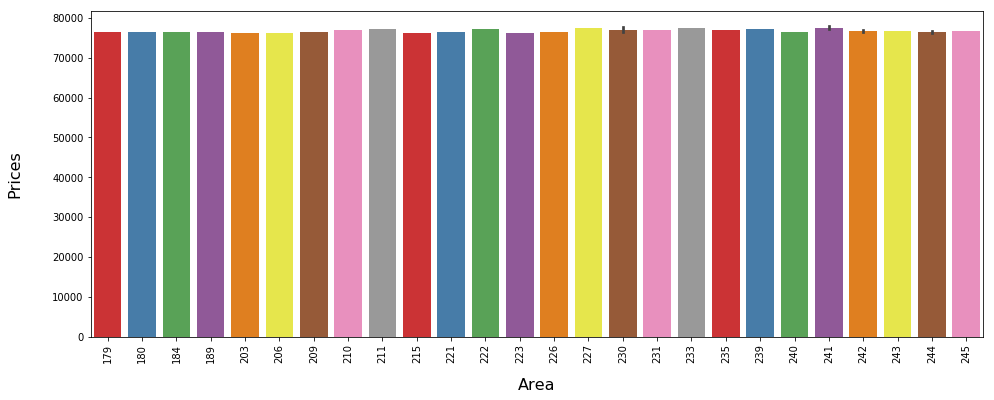

In [6]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Area', y='Prices', data=top_housing_prices.head(33), palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

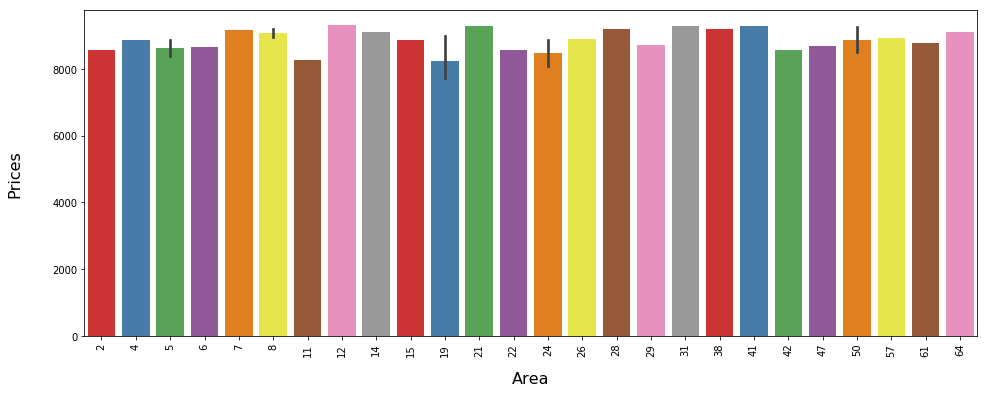

In [7]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Area', y='Prices', data=top_housing_prices.tail(33), palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

In [8]:
total = df.isnull().sum()[df.isnull().sum() != 0].sort_values(ascending = False)
percent = pd.Series(round(total/len(df)*100,2))
pd.concat([total, percent], axis=1, keys=['total_missing', 'percent'])

,total_missing,percent


In [9]:
print(np.isnan(df['Prices']))

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
499970    False
499971    False
499972    False
499973    False
499974    False
499975    False
499976    False
499977    False
499978    False
499979    False
499980    False
499981    False
499982    False
499983    False
499984    False
499985    False
499986    False
499987    False
499988    False
499989    False
499990    False
499991    False
499992    False
499993    False
499994    False
499995    False
499996    False
499997    False
499998    False
499999    False
Name: Prices, Length: 50

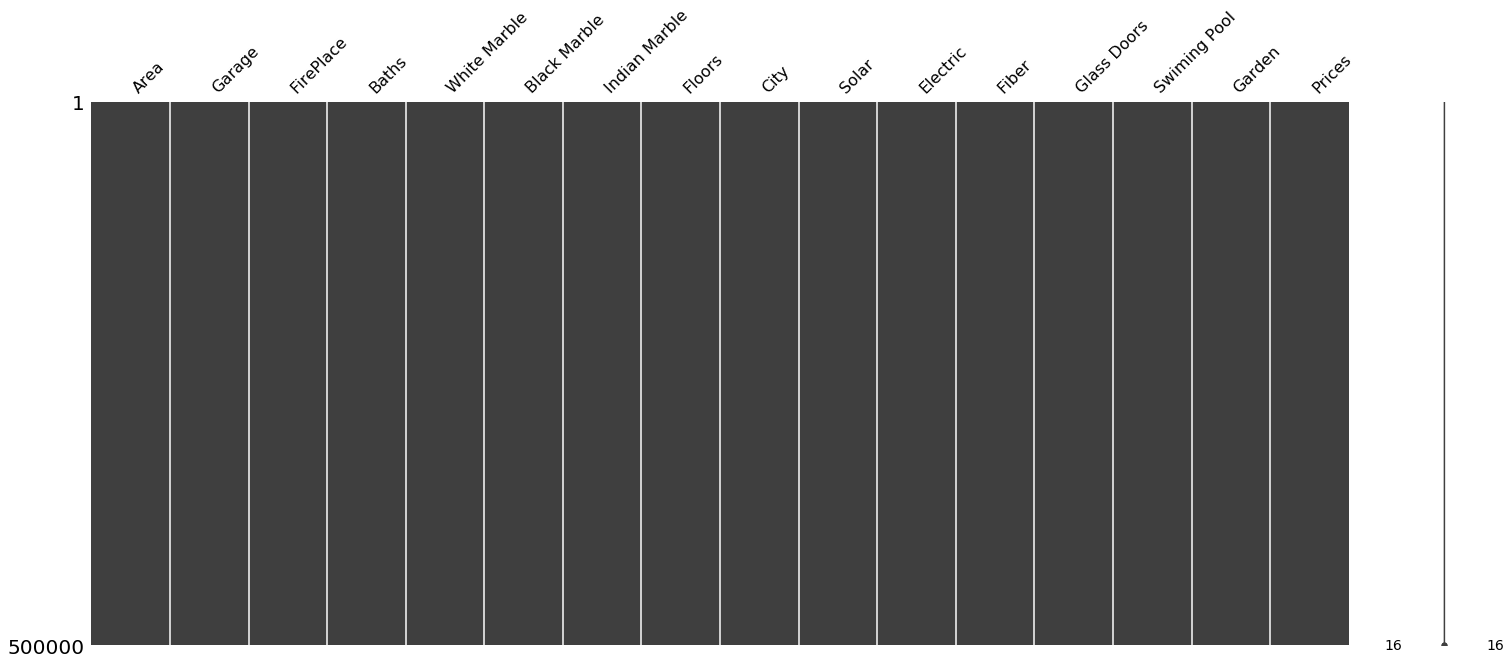

In [10]:
msno.matrix(df)

In [11]:
df.skew()

Area             0.000324
Garage          -0.002371
FirePlace       -0.002794
Baths            0.000948
White Marble     0.708739
Black Marble     0.710182
Indian Marble    0.702414
Floors           0.002456
City            -0.001726
Solar            0.005224
Electric        -0.002600
Fiber           -0.001872
Glass Doors      0.000520
Swiming Pool    -0.001744
Garden          -0.006584
Prices           0.035845
dtype: float64

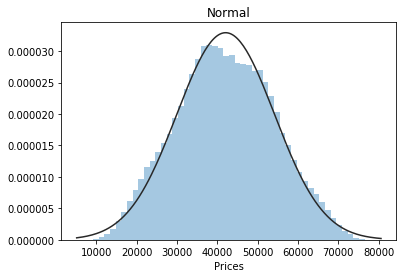

In [12]:
y = df['Prices']
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)

In [13]:
df.kurt()

Area            -1.197962
Garage          -1.501864
FirePlace       -1.299839
Baths           -1.299702
White Marble    -1.497695
Black Marble    -1.495648
Indian Marble   -1.506620
Floors          -2.000002
City            -1.498939
Solar           -1.999981
Electric        -2.000001
Fiber           -2.000004
Glass Doors     -2.000008
Swiming Pool    -2.000005
Garden          -1.999965
Prices          -0.492333
dtype: float64

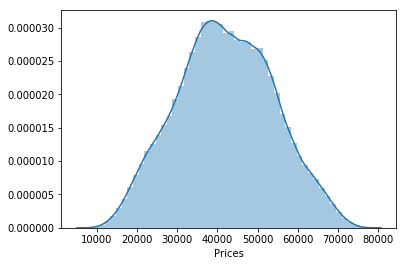

In [14]:
sns.distplot(df['Prices'])

In [15]:
df.corr()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
Area,1.000000,-0.000897,0.000374,-0.000398,0.002525,-0.001477,-0.001047,-0.000776,-0.003455,0.000526,-0.000128,0.000114,-0.001230,0.000610,0.001428,0.147717
Garage,-0.000897,1.000000,0.001307,-0.003647,0.000541,0.001847,-0.002385,-0.000931,0.000793,0.001480,0.000779,-0.000562,-0.002171,0.001088,-0.000669,0.100294
FirePlace,0.000374,0.001307,1.000000,0.000643,0.000952,-0.000922,-0.000030,0.000185,-0.000211,-0.000309,0.001342,0.001818,-0.000366,0.001295,0.000231,0.089139
Baths,-0.000398,-0.003647,0.000643,1.000000,0.002493,-0.002739,0.000246,-0.000880,-0.000858,-0.000755,0.001047,-0.000687,-0.001668,0.002212,0.001723,0.145087
White Marble,0.002525,0.000541,0.000952,0.002493,1.000000,-0.498893,-0.500723,0.000078,-0.000861,-0.001583,0.000558,-0.000576,-0.000402,-0.001898,0.000959,0.448154
Black Marble,-0.001477,0.001847,-0.000922,-0.002739,-0.498893,1.000000,-0.500383,-0.000368,-0.000324,0.001764,-0.000549,0.000073,0.000086,0.000713,0.000133,-0.078049
Indian Marble,-0.001047,-0.002385,-0.000030,0.000246,-0.500723,-0.500383,1.000000,0.000289,0.001184,-0.000180,-0.000010,0.000503,0.000316,0.001184,-0.001091,-0.369756
Floors,-0.000776,-0.000931,0.000185,-0.000880,0.000078,-0.000368,0.000289,1.000000,-0.000641,-0.002651,0.000082,0.001373,-0.000008,-0.000211,-0.000492,0.619451
City,-0.003455,0.000793,-0.000211,-0.000858,-0.000861,-0.000324,0.001184,-0.000641,1.000000,0.000488,0.000788,-0.002716,0.000770,0.000322,0.001207,0.233259
Solar,0.000526,0.001480,-0.000309,-0.000755,-0.001583,0.001764,-0.000180,-0.002651,0.000488,1.000000,0.001883,0.000238,-0.000817,-0.000466,-0.004263,0.008429


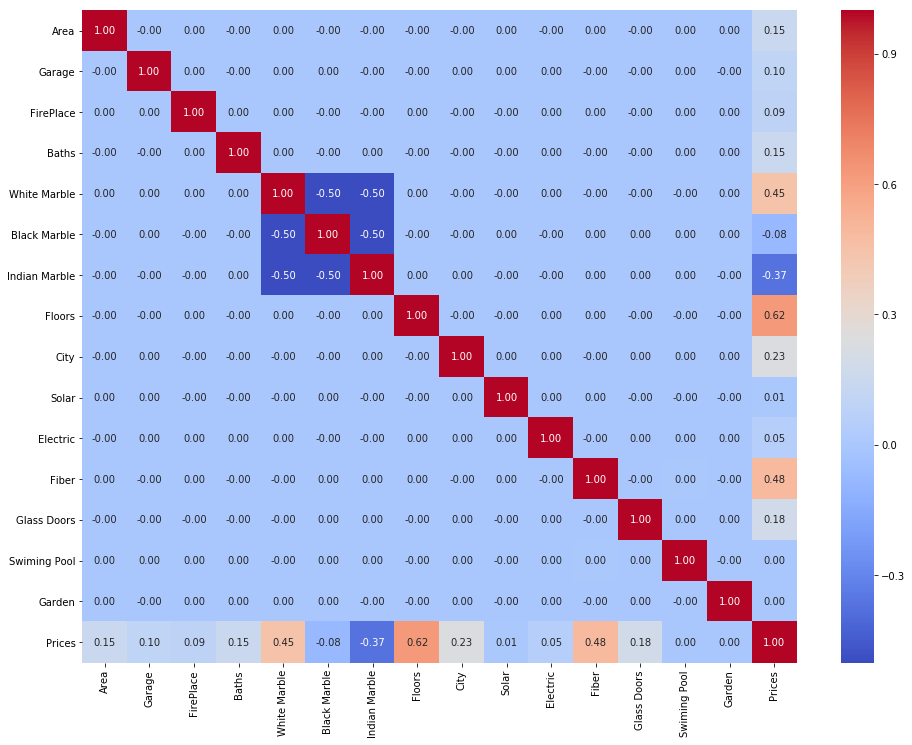

In [16]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df.iloc[:,:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [17]:
xs = df[['Area','Garage','FirePlace','Baths','White Marble','Black Marble','Indian Marble','Floors','City','Solar','Electric','Fiber','Glass Doors','Swiming Pool','Garden']]
ys = df['Prices']
len(xs), len(ys)

(500000, 500000)

In [52]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil

In [64]:
data_path = (r'C:\Users\jyoti\INFO_6105-master\INFO_6105-master\Assignments\Final Project\HousePrices_HalfMil.csv')

In [54]:
data_path=None
all_variables=None
test_path=None
# target='search_term'
target=None
nthreads=1                        # Number of parallel threads used to run Algorithms
min_mem_size=12
classification= False
scale=False
max_models=None    
model_path=None
balance_y=False 
balance_threshold=0.2             
name=None 
server_path=None  
analysis=0

In [55]:
run_time =  1000

In [56]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size, "GB")

3 GB


In [57]:
#Defining functions

#generating random run_id
def alphabet(n):
    alpha='0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'    
    str=''
    r=len(alpha)-1   
    while len(str)<n:
        i=random.randint(0,r)
        str+=alpha[i]   
    return str

# storing in m_data dictionary  
def set_meta_data(analysis,run_id,server,data,model_path,run_time,scale,model,balance,balance_threshold,name,path,nthreads,min_mem_size):
    
    
    m_data={}
    # m_data['target']=target
    #m_data['classification']=classification
    m_data['project'] =name
    m_data['run_time']=run_time
    m_data['run_id'] =run_id
    m_data['start_time_sec'] = time.time()
    m_data['min_mem_size'] = min_mem_size
    m_data['balance']=balance
    m_data['balance_threshold']=balance_threshold 
    m_data['max_models']=model
    m_data['scale']=scale  
    m_data['scale']=False
    m_data['model_path']=model_path
    m_data['server_path']=server
    m_data['data_path']=data 
    m_data['run_path'] =path
    m_data['nthreads'] = nthreads
  
    m_data['analysis'] = analysis
    m_data['end_time_sec'] = time.time()  
    return m_data

#converting dictionary to json
def dict_to_json(dct,n):
    j = json.dumps(dct, indent=4)
    f = open(n, 'w')
    print(j, file=f)
    f.close()
    
def get_all_variables_csv(i):
    ivd={}
    try:
        iv = pd.read_csv(i,header=None)
    except:
        sys.exit(1)    
    col=iv.values.tolist()[0]
    dt=iv.values.tolist()[1]
    i=0
    for c in col:
        ivd[c.strip()]=dt[i].strip()
        i+=1        
    return ivd
    
# Segregating in different lists of int, enum, reals and checking for missing values and then scaling(standardizing)    
def impute_missing_values(df, x, scal=False):
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in df.types.items():
        if key in x:
            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)            
            else: 
                reals.append(key)    
    _ = df[reals].impute(method='mean')
    _ = df[ints].impute(method='median')
    if scal:
        df[reals] = df[reals].scale()
        df[ints] = df[ints].scale()    
    return

# Determining Independent variables (X) from the dataset 
def get_independent_variables(df, targ):
    C = [name for name in df.columns if name != targ]
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in df.types.items():
        if key in C:
            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)            
            else: 
                reals.append(key)    
    x=ints+enums+reals
    return x

#Checkinh if X does not exist then remove
def check_X(x,df):
    for name in x:
        if name not in df.columns:
            x.remove(name)  
    return x

In [58]:
#RUN_ID

#randomly generating run_id through alphabet function
run_id=alphabet(9)
if server_path==None:
    server_path=os.path.abspath(os.curdir)
os.chdir(server_path) 
a = run_id + '_EmpAccess_' + str(run_time)
run_dir = os.path.join(server_path,a)
os.mkdir(run_dir)
os.chdir(run_dir)    

# run_id to std out
print (run_id)


3O7BboaED


In [59]:
# # Creating a log file
# logfile=run_id+'_autoh2o_log.zip'
# logs_path=os.path.join(run_dir,'logs')
# print(logs_path,' ',logfile)

In [60]:
name = run_id+'_EmpAccess_' + str(run_time)
name

'3O7BboaED_EmpAccess_1000'

In [61]:
# meta data
meta_data = set_meta_data(analysis, run_id,server_path,data_path,model_path,run_time,scale,max_models,balance_y,balance_threshold,name,run_dir,nthreads,min_mem_size)
print(meta_data)

{'project': '3O7BboaED_EmpAccess_1000', 'run_time': 1000, 'run_id': '3O7BboaED', 'start_time_sec': 1555546074.518602, 'min_mem_size': 3, 'balance': False, 'balance_threshold': 0.2, 'max_models': None, 'scale': False, 'model_path': None, 'server_path': 'C:\\Users\\jyoti\\INFO_6105-master\\INFO_6105-master\\Assignments\\Final Project\\i9a8yHolP_EmpAccess_1000', 'data_path': None, 'run_path': 'C:\\Users\\jyoti\\INFO_6105-master\\INFO_6105-master\\Assignments\\Final Project\\i9a8yHolP_EmpAccess_1000\\3O7BboaED_EmpAccess_1000', 'nthreads': 1, 'analysis': 0, 'end_time_sec': 1555546074.518602}


In [62]:
if classification :
    meta_data["Problem_type"] = "Classification"
    print("Problem Type:  Classification")
else:
    meta_data["Problem_type"] = "Regression"
    print("Problem Type:  Regression")

Problem Type:  Regression


In [63]:
# 65535 Highest port no
port_no=random.randint(5555,55555)

#initializing H2O
h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no)

Checking whether there is an H2O instance running at http://localhost:47109..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (build 25.152-b12, mixed mode)56-b12)
  Starting server from C:\Users\jyoti\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\jyoti\AppData\Local\Temp\tmpgjtn5pqx
  JVM stdout: C:\Users\jyoti\AppData\Local\Temp\tmpgjtn5pqx\h2o_jyoti_started_from_python.out
  JVM stderr: C:\Users\jyoti\AppData\Local\Temp\tmpgjtn5pqx\h2o_jyoti_started_from_python.err
  Server is running at http://127.0.0.1:47109
Connecting to H2O server at http://127.0.0.1:47109... successful.


H2O cluster uptime:,09 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.6
H2O cluster version age:,1 month and 3 days
H2O cluster name:,H2O_from_python_jyoti_dpafpd
H2O cluster total nodes:,1
H2O cluster free memory:,3.521 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [65]:
print(data_path)

C:\Users\jyoti\INFO_6105-master\INFO_6105-master\Assignments\Final Project\HousePrices_HalfMil.csv


In [66]:
#importing data file on h2o server
data = h2o.import_file(data_path)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [67]:
data.head()

Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
164,2,0,2,0,1,0,0,3,1,1,1,1,0,0,43800
84,2,0,4,0,0,1,1,2,0,0,0,1,1,1,37550
190,2,4,4,1,0,0,0,2,0,0,1,0,0,0,49500
75,2,4,4,0,0,1,1,1,1,1,1,1,1,1,50075
148,1,4,2,1,0,0,1,2,1,0,0,1,1,1,52400
124,3,3,3,0,1,0,1,1,0,0,1,1,1,1,54300
58,1,0,2,0,0,1,0,3,0,1,1,1,0,1,34400
249,2,1,1,1,0,0,1,1,0,1,0,1,1,0,50425
243,1,0,2,0,0,1,1,1,0,0,0,0,1,0,29575
242,1,2,4,0,0,1,0,2,1,0,0,0,1,0,22300


In [68]:
rows = len(data)
print("Total rows in the data set = ", rows)
cols = len(data.columns)
print("Total Columns in the data set = ", cols)

rowscols = data.shape
shape = rows * cols
print("rows X columns = ", rowscols)
print("Total Records = ", shape)

meta_data['Total Records'] = shape

Total rows in the data set =  500000
Total Columns in the data set =  16
rows X columns =  (500000, 16)
Total Records =  8000000


In [69]:
name = run_id+'HousePrices_HalfMil_1000'
name

'3O7BboaEDHousePrices_HalfMil_1000'

In [70]:
# dependent variable
# assign target an d inputs for classification or regression
if target==None:
    target="Prices"   
y = target
meta_data['Target']=y
y

'Prices'

In [71]:
if all_variables is not None:
    ivd=get_all_variables_csv(all_variables)
    print(ivd)    
    X=check_all_variables(data,ivd,y)
    print(X)

In [72]:
# independent variables
# putting all independent variables in the list X 

X = []  
if all_variables is None:
    X=get_independent_variables(data, target)  
    print(X)  
else: 
    ivd=get_all_variables_csv(all_variables)    
    X=check_all_variables(data, ivd)


X=check_X(X,data)


# Add independent variables to meta data

meta_data['X']=X  


# impute missing values

_=impute_missing_values(data,X, scale)

['Area', 'Garage', 'FirePlace', 'Baths', 'White Marble', 'Black Marble', 'Indian Marble', 'Floors', 'City', 'Solar', 'Electric', 'Fiber', 'Glass Doors', 'Swiming Pool', 'Garden']


In [73]:
def get_variables_types(data):
    d={}
    for key, val in data.types.items():
        d[key]=val           
    return d

In [74]:
allV=get_variables_types(data)
allV

{'Area': 'int',
 'Garage': 'int',
 'FirePlace': 'int',
 'Baths': 'int',
 'White Marble': 'int',
 'Black Marble': 'int',
 'Indian Marble': 'int',
 'Floors': 'int',
 'City': 'int',
 'Solar': 'int',
 'Electric': 'int',
 'Fiber': 'int',
 'Glass Doors': 'int',
 'Swiming Pool': 'int',
 'Garden': 'int',
 'Prices': 'int'}

In [75]:
# Adding the data types to meta data 
meta_data['variables']=allV

In [76]:
data1 = h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [77]:
train,test = data.split_frame(ratios=[0.8],seed=123)

In [78]:
x = ['Area','Garage','FirePlace','Baths','White Marble','Black Marble','Indian Marble','Floors','City','Solar','Electric','Fiber','Glass Doors','Swiming Pool','Garden']
y = 'Prices'

In [79]:
from h2o.automl import H2OAutoML
aml = H2OAutoML(max_runtime_secs=1000)

In [80]:
model_start_time = time.time()

In [81]:
aml.train(x=x,y=y,training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [82]:
execution_time =  time.time() - model_start_time
meta_data['model_execution_time_sec'] = execution_time
print("Execution time for ", run_time,"sec =  ",meta_data['model_execution_time_sec'])

Execution time for  1000 sec =   1060.0588459968567


In [54]:
lb2 = aml.leaderboard.as_data_frame()
lb2

,model_id,mean_residual_deviance,rmse,mse,mae,rmsle
0,GBM_2_AutoML_20190417_182705,2.966410e+04,172.232686,2.966410e+04,136.530259,0.004781
1,GBM_1_AutoML_20190417_182705,3.482398e+04,186.611848,3.482398e+04,148.092800,0.005145
2,GLM_grid_1_AutoML_20190417_181353_model_1,1.463908e+08,12099.205650,1.463908e+08,9888.143986,0.320038
3,GLM_grid_1_AutoML_20190417_182705_model_1,1.463908e+08,12099.205650,1.463908e+08,9888.143986,0.320038
4,StackedEnsemble_BestOfFamily_AutoML_20190417_1...,1.463913e+08,12099.225749,1.463913e+08,9888.129941,0.320038
5,StackedEnsemble_AllModels_AutoML_20190417_181353,1.463913e+08,12099.226738,1.463913e+08,9888.129709,0.320038


In [55]:
length = len(lb1)- 1
length
meta_data["Models_generated"] = length

In [56]:
# save leaderboard to csv
# run_time = run_time.ascharacter()
leaderboard_stats=run_id+'Melbournehousingprices_500' + '_leaderboard.csv'
lb1.to_csv(leaderboard_stats)

In [57]:
# STart best model as first model
model_set=lb1['model_id']
mod_best=h2o.get_model(model_set[0])

In [58]:
mod_best.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GBM_2_AutoML_20190417_182705',
   'type': 'Key<Model>',
   'URL': '/3/Models/GBM_2_AutoML_20190417_182705'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_py_6_sid_9ee3',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_py_6_sid_9ee3'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default': False, 'actual': False},
 'score_tree_interval': {'default': 0, 'actual': 5},
 'fold_assignment': {'default

In [59]:
aml.leader.model_performance(test)


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 27569.558546292516
RMSE: 166.0408339725277
MAE: 131.47522386945926
RMSLE: 0.004623596710396046
Mean Residual Deviance: 27569.558546292516


In [60]:
# generating normalized coeff.
mods=mod_best.coef_norm
print(mods)

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_2_AutoML_20190417_182705


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 26149.941886676665
RMSE: 161.70943660367092
MAE: 127.9736890708115
RMSLE: 0.004511833619352955
Mean Residual Deviance: 26149.941886676665

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 29664.09803465186
RMSE: 172.23268573256314
MAE: 136.53025903109298
RMSLE: 0.004780520764551986
Mean Residual Deviance: 29664.09803465186
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,136.53026,1.0971618,139.13708,137.32744,134.7794,135.4082,135.99913
mean_residual_deviance,29664.096,489.95078,30868.846,29935.104,28912.568,29146.094,29457.863
mse,29664.096,489.95078,30868.846,29935.104,28912.568,29146.094,29457.863
r2,0.9997973,0.0000032,0.9997894,0.9997954,0.9998014,0.9998018,0.9997989
residual_deviance,29664.096,489.95078,30868.846,29935.104,28912.568,29146.094,29457.863
rmse,172.22102,1.4166003,175.69531,173.01764,170.03696,170.72227,171.63293
rmsle,0.0047801,0.0000458,0.0048779,0.0047752,0.0046803,0.0047568,0.0048101


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
,2019-04-17 18:38:27,3 min 46.377 sec,0.0,12099.2315897,9888.1719803,146391405.0603352
,2019-04-17 18:38:28,3 min 47.299 sec,5.0,7929.2491742,6469.5038915,62872992.4662298
,2019-04-17 18:38:28,3 min 48.096 sec,10.0,5436.1141902,4422.7114477,29551337.4884435
,2019-04-17 18:38:29,3 min 49.002 sec,15.0,3657.5619692,2964.8371937,13377759.5583572
,2019-04-17 18:38:30,3 min 49.767 sec,20.0,2626.4427156,2128.5117430,6898201.3384635
---,---,---,---,---,---,---
,2019-04-17 18:38:59,4 min 18.964 sec,220.0,162.4198721,128.5329268,26380.2148626
,2019-04-17 18:39:00,4 min 19.605 sec,225.0,161.7094366,127.9736891,26149.9418867
,2019-04-17 18:39:00,4 min 19.792 sec,230.0,161.7094366,127.9736891,26149.9418867
,2019-04-17 18:39:00,4 min 19.948 sec,235.0,161.7094366,127.9736891,26149.9418867



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Floors,116001219805184.0000000,1.0,0.4265708
Fiber,60367396929536.0000000,0.5204031,0.2219888
White Marble,40338743885824.0000000,0.3477441,0.1483375
City,13632411795456.0000000,0.1175196,0.0501304
Indian Marble,11609458081792.0000000,0.1000805,0.0426914
Glass Doors,8269725171712.0000000,0.0712900,0.0304102
Black Marble,5807332130816.0000000,0.0500627,0.0213553
Area,5482950950912.0000000,0.0472663,0.0201624
Baths,5267784728576.0000000,0.0454115,0.0193712
Garage,2539710578688.0000000,0.0218938,0.0093393


<bound method ModelBase.coef_norm of >


In [61]:
model_set=lb1['model_id']
type(model_set)

pandas.core.series.Series

In [62]:
jsonDicts = []
for m in model_set.iteritems():
    m,model_name = m
    mod_best = h2o.get_model(model_name)
    jsonDicts.append(mod_best.params)

In [63]:
print(jsonDicts)

[{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GBM_2_AutoML_20190417_182705', 'type': 'Key<Model>', 'URL': '/3/Models/GBM_2_AutoML_20190417_182705'}}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'automl_training_py_6_sid_9ee3', 'type': 'Key<Frame>', 'URL': '/3/Frames/automl_training_py_6_sid_9ee3'}}, 'validation_frame': {'default': None, 'actual': None}, 'nfolds': {'default': 0, 'actual': 5}, 'keep_cross_validation_models': {'default': True, 'actual': False}, 'keep_cross_validation_predictions': {'default': False, 'actual': True}, 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False}, 'score_each_iteration': {'default': False, 'actual': False}, 'score_tree_interval': {'default': 0, 'actual': 5}, 'fold_assignment': {'default': 'AUTO', 'actual': 'Modulo'}, 'fold_column':

In [64]:
n=run_id+'MelbourneHousingPrices_1000_hy_parameter.json'
dict_to_json(jsonDicts,n)

In [65]:
meta_data['end_time'] = time.time()

In [66]:
meta_data

{'project': 'd5nTmwyIp_EmpAccess_500',
 'run_time': 500,
 'run_id': 'd5nTmwyIp',
 'start_time_sec': 1555539172.6287012,
 'min_mem_size': 1,
 'balance': False,
 'balance_threshold': 0.2,
 'max_models': None,
 'scale': False,
 'model_path': None,
 'server_path': 'C:\\Users\\jyoti\\INFO_6105-master\\INFO_6105-master\\Assignments\\Final Project',
 'data_path': None,
 'run_path': 'C:\\Users\\jyoti\\INFO_6105-master\\INFO_6105-master\\Assignments\\Final Project\\d5nTmwyIp_EmpAccess_500',
 'nthreads': 1,
 'analysis': 0,
 'end_time_sec': 1555539172.6287012,
 'Problem_type': 'Regression',
 'Total Records': 8000000,
 'Target': 'Prices',
 'X': ['Area',
  'Garage',
  'FirePlace',
  'Baths',
  'White Marble',
  'Black Marble',
  'Indian Marble',
  'Floors',
  'City',
  'Solar',
  'Electric',
  'Fiber',
  'Glass Doors',
  'Swiming Pool',
  'Garden'],
 'variables': {'Area': 'int',
  'Garage': 'int',
  'FirePlace': 'int',
  'Baths': 'int',
  'White Marble': 'int',
  'Black Marble': 'int',
  'Indian Ma

In [67]:
n=run_id+'MelbHousingPrices_1000_meta_data.json'
dict_to_json(meta_data,n)